# Machine Learning Workflow

### 1. Define Business Goal

Goal should be something measurable; e.g. create a model that classifies penguin species with 85% accuracy.

### 2. Get Data

Where can you get data?
* web scraping (week 4)
* public APIs (week 6)
* published/public datasets (e.g. government databases, open data initiatives)
* buy data
* hacking
* sensor/camera/satellite data
* collect yourself, e.g. surveys

In [1]:
# Read pengiun data from csv file
import pandas as pd

In [5]:
df =pd.read_csv('penguins_simple.csv', sep = ';')
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


#### 2.1. Assign X and y

In [6]:
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']]#features
y = df['Species']#label species

In [7]:
X.shape, y.shape #check shape

((333, 3), (333,))

In [10]:
X

,Culmen Length (mm),Culmen Depth (mm),Body Mass (g)
0,39.1,18.7,3750.0
1,39.5,17.4,3800.0
2,40.3,18.0,3250.0
3,36.7,19.3,3450.0
4,39.3,20.6,3650.0
...,...,...,...
328,47.2,13.7,4925.0
329,46.8,14.3,4850.0
330,50.4,15.7,5750.0
331,45.2,14.8,5200.0


In [11]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
328    Gentoo
329    Gentoo
330    Gentoo
331    Gentoo
332    Gentoo
Name: Species, Length: 333, dtype: object

### 3. Train-Test Split

We train-test split to build a generalizable model that doesn't overfit. \
Doing train-test split helps us _detect_ overfitting — it doesn't help us _prevent_ overfitting. Regularization (next week!) helps us do that.

In [8]:
import sklearn

In [13]:
sklearn.__version__

'1.0.2'

In [12]:
#!pip install -U scikit-learn

In [14]:
from sklearn.model_selection import train_test_split

In [20]:
# OPTION 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_sze: the percentage of data we need to test
# random_state = 100000 is a number that says which random function we use and we make it constant every time we run the code. In other words it will give always the same random values.

In [18]:
X_train.shape, y_train.shape

((266, 3), (266,))

In [19]:
# OPTION 2
# For EDA you may want to split the original dataframe, and assign X and y later
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

### 4. Explore the Data The X_train and y_train

Be creative!
* Plot all the things!
* Check for missing data 
* `df.corr()`
* `sns.pairplot()`

<AxesSubplot:>

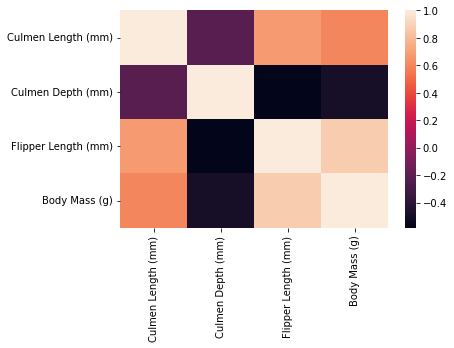

In [24]:
import seaborn as sns
sns.heatmap(df_train.corr())

Do data exploration on _training data_ only!

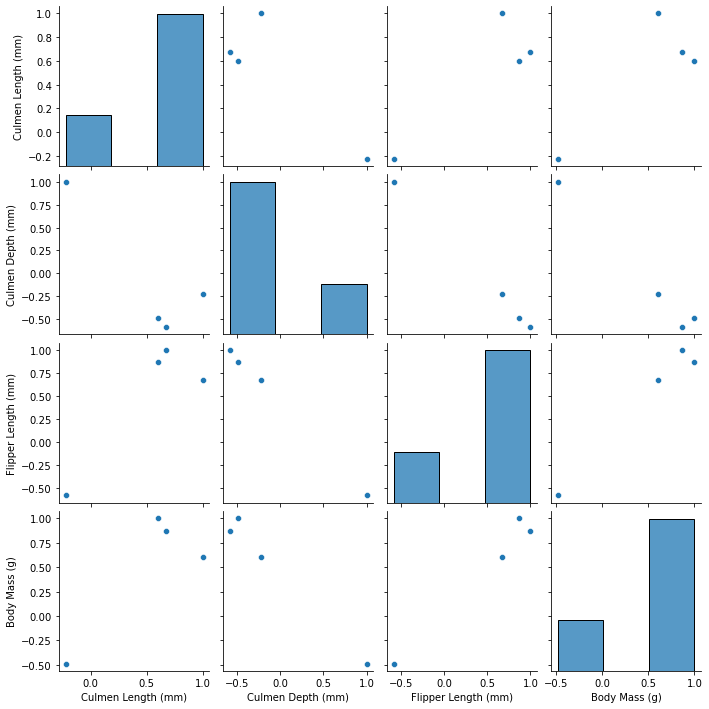

In [26]:
sns.pairplot(df_train.corr())

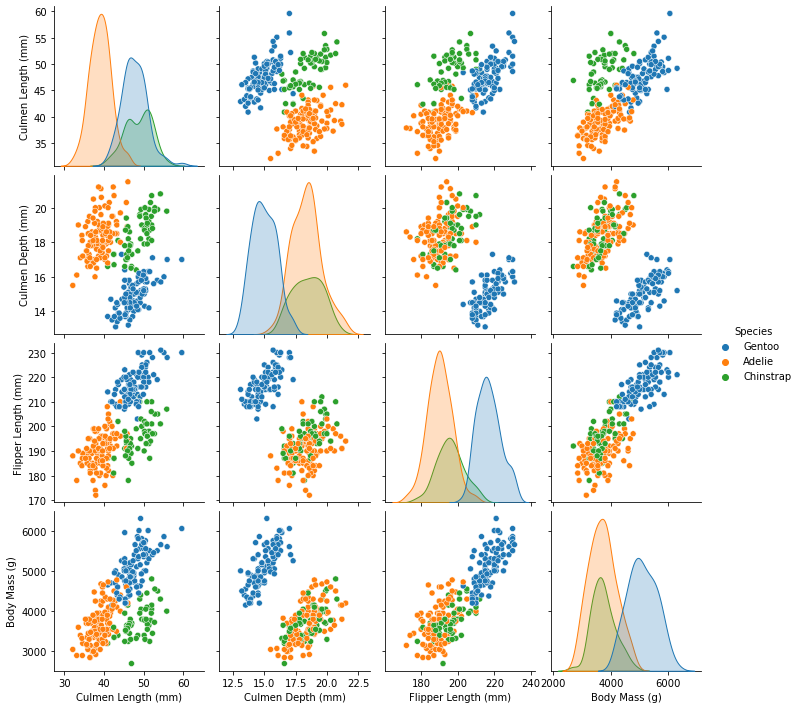

In [29]:
sns.pairplot(df_train, hue = 'Species')

<AxesSubplot:>

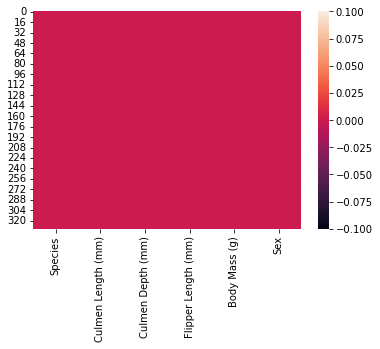

In [30]:
sns.heatmap(df.isna())

### 5. Feature Engineering

FE is about finding the right representation for your data:
* Which features help me build a better model?
* How should I format them to include them into my model?

### 6. Train model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [39]:
m = LogisticRegression()
#m = DummyClassifier(strategy="prior", random_state=None, constant=None) # logistic regression, decision tree, random forest

In [40]:
#train the model
m.fit(X_train, y_train)


LogisticRegression()

### 7. Optimize

* Cross-validation tomorrow
* Hyperparameter optimization next week

### 8. Calculate Test Score

In [41]:
# run this for your training dataset
m.score(X_train, y_train)

0.9962406015037594

In [45]:
# run this for your test dataset
m.score(X_test, y_test)

0.9701492537313433

In [46]:
X_test

,Culmen Length (mm),Culmen Depth (mm),Body Mass (g)
25,39.5,16.7,3250.0
309,46.9,14.6,4875.0
73,42.1,19.1,4000.0
195,49.8,17.3,3675.0
57,41.1,18.2,4050.0
...,...,...,...
280,43.5,14.2,4700.0
3,36.7,19.3,3450.0
77,35.1,19.4,4200.0
311,51.1,16.5,5250.0


In [47]:
# run this for Kaggle test dataset
m.predict(X_test)

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'], dtype=object)

### 9. Submit to Kaggle